<a href="https://colab.research.google.com/github/baobao1022002/LabMachineLearning/blob/master/Lab_7_20130475_NguyenQuocBao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [2]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/lab2'



Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/lab2


In [56]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.svm import SVC
import numpy as np
from sklearn.feature_selection import RFE,chi2
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.naive_bayes import CategoricalNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from prettytable import PrettyTable
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler



#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [4]:
dataset = datasets.load_iris()
X=dataset['data']
Y=dataset['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=1)

clf = svm.SVC (kernel='sigmoid', random_state=0)
clf.fit(X_train,Y_train)
scores = cross_validate(clf, X_train, Y_train, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean (scores ['test_score']))

print(clf.predict(X_test))


['fit_time', 'score_time', 'test_score']
0.21727272727272728
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


In [5]:
cv= KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model= svm.SVC (kernel='sigmoid', random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv) 
print(scores.mean())



0.24727272727272723


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [24]:
#code
selector=SelectKBest(chi2,k=2)
X_new=selector.fit_transform(X_train,Y_train)
selector.fit(X_train, Y_train)
X_test_selected = selector.transform(X_test)

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_new, Y_train)

scores = cross_validate(rf_clf, X_new, Y_train, scoring='accuracy', cv=10)

print(sorted(scores.keys()))
print(np.mean(scores ['test_score']))
print(rf_clf.predict(X_test_selected))


['fit_time', 'score_time', 'test_score']
0.9327272727272728
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [8]:
cv= KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(rf_clf, X_train, Y_train, scoring='accuracy', cv=cv) 
print(scores.mean())

0.9627272727272727


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [7]:
# code
mnist_dts=datasets.load_digits()




In [34]:
# building model
kmeans = KMeans(n_clusters = 10, random_state = 0)
cv= KFold(n_splits=10, random_state=1, shuffle=True)
kmeans.fit(mnist_dts.data)
clusters = kmeans.predict(mnist_dts.data)
y_pred = cross_val_predict(kmeans, mnist_dts.data, cv=cv)

accuracyKm = accuracy_score(mnist_dts.target, y_pred)
precisionKm = precision_score(mnist_dts.target, y_pred, average='macro')
recallKm = recall_score(mnist_dts.target, y_pred, average='macro')
f1Km = f1_score(mnist_dts.target, y_pred, average='macro')
print(kmeans.cluster_centers_.shape)
print("Accuracy: {:.3f}".format(accuracyKm))
print("Precision: {:.3f}".format(precisionKm))
print("Recall: {:.3f}".format(recallKm))
print("F1-score: {:.3f}".format(f1Km))







/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

(10, 64)
Accuracy: 0.069
Precision: 0.071
Recall: 0.069
F1-score: 0.070


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [35]:
# code
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(mnist_dts['data'], mnist_dts['target'], test_size = 0.3,random_state=0)
clf.fit(X_train2,Y_train2)

rfc = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier()
nb = GaussianNB()
classifiers = [rfc, knn, nb]
t=PrettyTable(['Name metric mesura','Accuracy','Precision', 'Recall','F1 measures'])
t.add_row(["K-Means algorithm",accuracyKm,precisionKm,recallKm,f1Km])



for clf in classifiers:
    acc_scores = cross_val_score(clf, X_train2, Y_train2, cv=10, scoring='accuracy')
    prec_scores = cross_val_score(clf, X_train2, Y_train2, cv=10, scoring='precision_macro')
    rec_scores = cross_val_score(clf, X_train2, Y_train2, cv=10, scoring='recall_macro')
    f1_scores = cross_val_score(clf, X_train2, Y_train2, cv=10, scoring='f1_macro')

    t.add_row([clf,acc_scores.mean(),prec_scores.mean(),rec_scores.mean(),f1_scores.mean()])
  
    # print(type(clf).__name__)
    # print(f"Accuracy: {acc_scores.mean():.3f}")
    # print(f"Precision: {prec_scores.mean():.3f}")
    # print(f"Recall: {rec_scores.mean():.3f}")
    # print(f"F1: {f1_scores.mean():.3f}\n")


print(t)





+--------------------------+---------------------+---------------------+--------------------+--------------------+
|    Name metric mesura    |       Accuracy      |      Precision      |       Recall       |    F1 measures     |
+--------------------------+---------------------+---------------------+--------------------+--------------------+
|    K-Means algorithm     | 0.06900389538119088 | 0.07060883652956507 | 0.0690004863112482 | 0.0697328270716115 |
| RandomForestClassifier() |  0.9713587301587303 |  0.9738136863136863 | 0.9704978354978355 | 0.9721902297202464 |
|  KNeighborsClassifier()  |  0.9801079365079367 |  0.9812612387612389 | 0.9792773892773893 | 0.9793351334655682 |
|       GaussianNB()       |  0.840088888888889  |  0.8634228791504333 | 0.8384540459540458 | 0.8360707137489195 |
+--------------------------+---------------------+---------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

    ==>> From the obtained results, I concluded Supervised learning is approach better than Unsupervised learning

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [51]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(mnist_dts.data)
labels = cluster.labels_



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


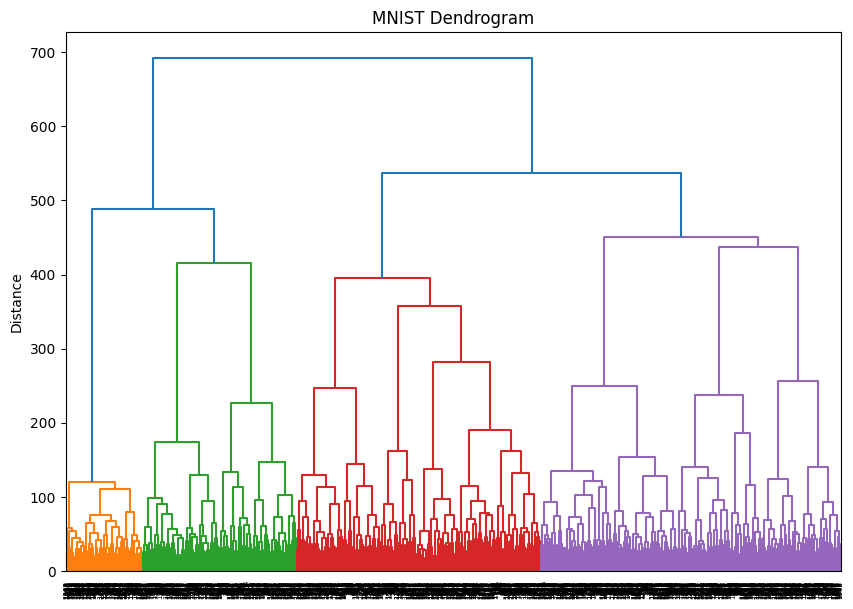

In [52]:
plt.figure(figsize=(10, 7))
plt.title('MNIST Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(mnist_dts.data, method='ward'))
plt.ylabel('Distance')
plt.show()

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





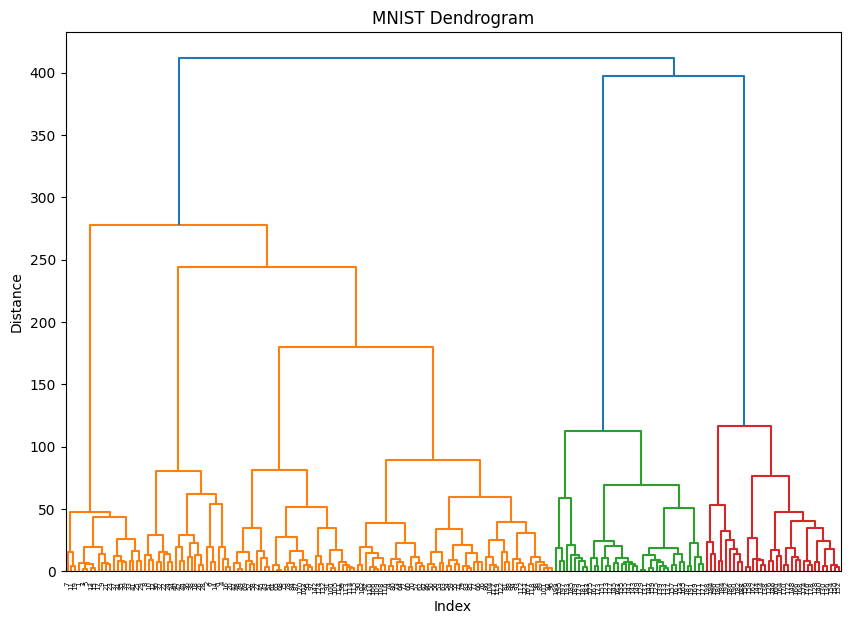

In [59]:
#code
shop_dataset=pd.read_csv("shopping-data.csv")
shop_dataset.drop(['CustomerID', 'Genre'], axis=1, inplace=True)

plt.figure(figsize=(10, 7))
dendrogram = shc.dendrogram(shc.linkage(shop_dataset, method='ward'))
plt.title('MNIST Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

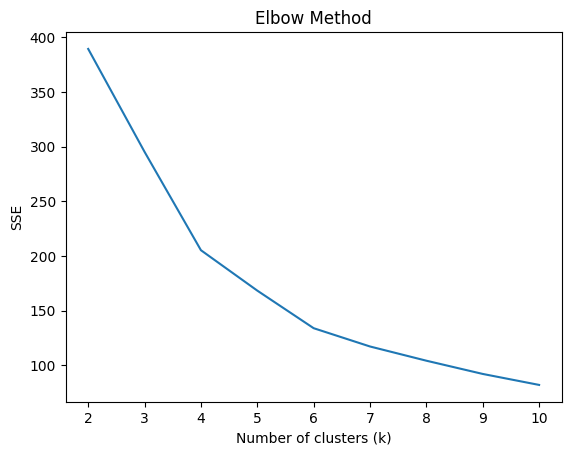

In [70]:
#code
scaler = StandardScaler()
data_scaled = scaler.fit_transform(shop_dataset)

# Apply K-Means clustering for k values ranging from 2 to 10
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE values against k
plt.plot(range(2, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()



*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [71]:
#code
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(shop_dataset)
labels = cluster.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


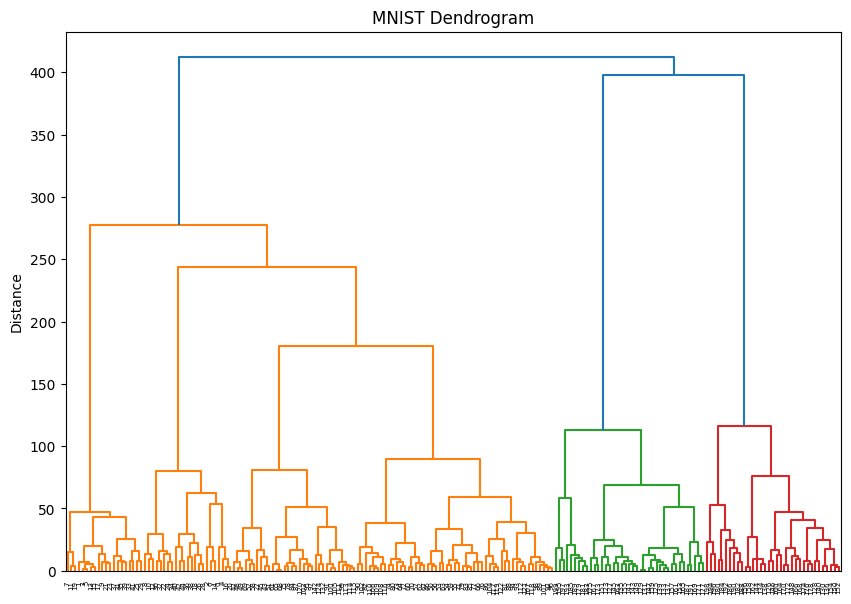

In [72]:
plt.figure(figsize=(10, 7))
plt.title('MNIST Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(shop_dataset, method='ward'))
plt.ylabel('Distance')
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.